In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Tc = 1034
T_mess = [400, 300, 200, 100]

def Bloch(T, Tc):
    return 1 - (T/Tc)**(3/2)

print(Bloch(300, 1034))

0.8437208379434509


In [3]:
print(33 / 0.8437)

39.11342894393742


In [4]:
Tc = nx.Var(1043, id = "Tc")

mag_0 = nx.Var(39.12, id ="mag_0")

expo = nx.Var(3/2, id = "exp")

def Bloch(T, Tc, M, exponent):
    return M * (1 - (T/Tc)**(exponent))

In [5]:
m1 = Bloch(T_mess[0], Tc.value, mag_0.value, expo.value)
print(m1)

29.82900191702804


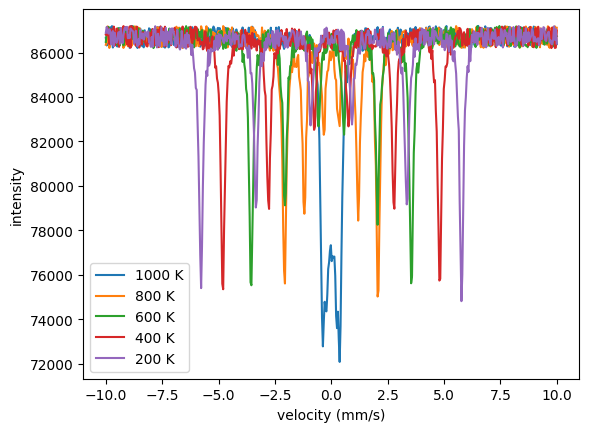

In [6]:
site = nx.Hyperfine(magnetic_field = 0,
                    isotropic = True)

mat_Fe = nx.Material.Template(nx.lib.material.Fe)

mat_Fe.hyperfine_sites = [site]

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = 3000)

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()
beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

velocities = np.linspace(-10, 10, 512)

spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                 velocity = velocities)

site.magnetic_field = Bloch(1000, Tc.value, mag_0.value, expo.value)
intensity_1000 = spectrum.Calculate()

site.magnetic_field = Bloch(800, Tc.value, mag_0.value, expo.value)
intensity_800 = spectrum.Calculate()

site.magnetic_field = Bloch(600, Tc.value, mag_0.value, expo.value)
intensity_600 = spectrum.Calculate()

site.magnetic_field = Bloch(400, Tc.value, mag_0.value, expo.value)
intensity_400 = spectrum.Calculate()

site.magnetic_field = Bloch(200, Tc.value, mag_0.value, expo.value)
intensity_200 = spectrum.Calculate()

def data(int):
    d = 1e5 * int + 1e3 * np.random.rand(len(int))
    return np.rint(d)

intensity_1000 = data(intensity_1000)
intensity_800 = data(intensity_800)
intensity_600 = data(intensity_600)
intensity_400 = data(intensity_400)
intensity_200 = data(intensity_200)

# plot both the model and the measured data
plt.plot(velocities, intensity_1000, label = "1000 K")
plt.plot(velocities, intensity_800, label = "800 K")
plt.plot(velocities, intensity_600, label = "600 K")
plt.plot(velocities, intensity_400, label = "400 K")
plt.plot(velocities, intensity_200, label = "200 K")
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.legend()
plt.show()

nx.data.Save("spectrum_1000K.txt", [velocities, intensity_1000])
nx.data.Save("spectrum_800K.txt", [velocities, intensity_800])
nx.data.Save("spectrum_600K.txt", [velocities, intensity_600])
nx.data.Save("spectrum_400K.txt", [velocities, intensity_400])
nx.data.Save("spectrum_200K.txt", [velocities, intensity_200])